<a href="https://colab.research.google.com/github/Rohithtechis/Linear-Regression-project/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)

In [92]:
#Loading Data
Bikes_df=pd.read_csv("/content/SeoulBikeData.csv")

In [93]:
Bikes_df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [94]:
Bikes_df.shape

(8760, 14)

In [95]:
Bikes_df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#Factores influencing total bikes rented

In [96]:
Bikes_df.columns.values

array(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(C)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'], dtype=object)

In [97]:
# Missing Values
Bikes_df.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [98]:
from datetime import datetime
Bikes_df.Date=pd.to_datetime(Bikes_df.Date )
Bikes_df.info()
Bikes_df['Month']=pd.DatetimeIndex(Bikes_df['Date']).month
Bikes_df['Year']=pd.DatetimeIndex(Bikes_df['Date']).year
Bikes_df['tday']=pd.DatetimeIndex(Bikes_df['Date']).day
Bikes_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30


In [99]:
Bikes_df.dtypes

Date                        datetime64[ns]
Rented Bike Count                    int64
Hour                                 int64
Temperature(C)                     float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     int64
Dew point temperature(C)           float64
Solar Radiation (MJ/m2)            float64
Rainfall(mm)                       float64
Snowfall (cm)                      float64
Seasons                             object
Holiday                             object
Functioning Day                     object
Month                                int64
Year                                 int64
tday                                 int64
dtype: object

<function matplotlib.pyplot.show>

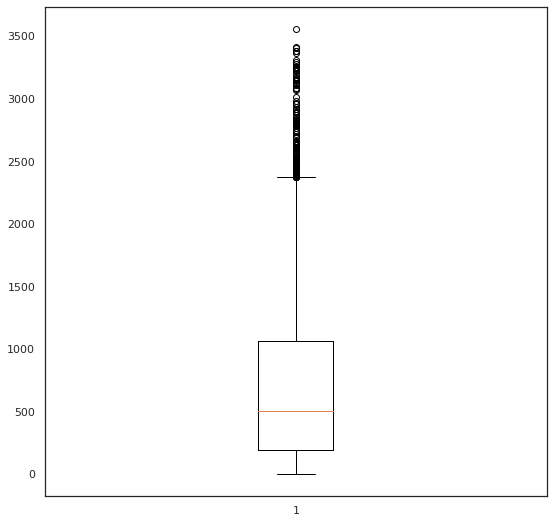

In [100]:
plt.figure(figsize=(9,9))
plt.boxplot(Bikes_df['Rented Bike Count'])
plt.show


In [101]:
Bikes_categorical=Bikes_df.select_dtypes(include='object')

In [102]:
Bikes_categorical.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [ ]:
# Implimenting the Dummies for Categorical variables

In [103]:
Bikes_categorical2=Bikes_df
for cols in Bikes_categorical:
  dummies =pd.get_dummies(Bikes_df[cols],drop_first=True)
  Bikes_categorical2 = pd.concat([Bikes_categorical2,dummies],axis='columns')

In [104]:
Bikes_categorical2.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday,Spring,Summer,Winter,No Holiday,Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1


In [ ]:
# analysis for Outliers

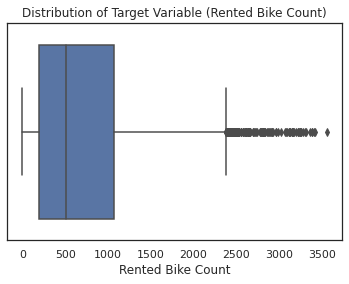

In [105]:
# For the columns having we will remove them and consider only those values which lie between 25th precentile and 75 percentile.
sns.boxplot(Bikes_categorical2['Rented Bike Count'])
plt.title('Distribution of Target Variable (Rented Bike Count)')
plt.show()

In [106]:
# Removing the outliers
Q1 = np.percentile(Bikes_categorical2['Rented Bike Count'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(Bikes_categorical2['Rented Bike Count'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(Bikes_categorical2['Rented Bike Count'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1120.75
upper limit: 2377.25


In [107]:
Bikes_categorical2.rename(columns = {'Rented Bike Count':'RBC'}, inplace = True)

In [108]:
Bikes_df2 = Bikes_categorical2[Bikes_categorical2.RBC< up_lim]
Bikes_df2=Bikes_df2[Bikes_df2.RBC> low_lim]

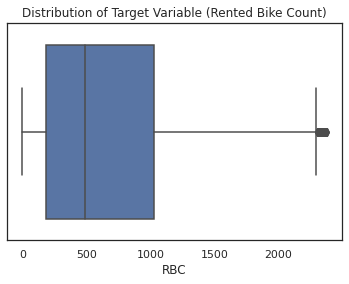

In [109]:
sns.boxplot(Bikes_df2['RBC'])
plt.title('Distribution of Target Variable (Rented Bike Count)')
plt.show()

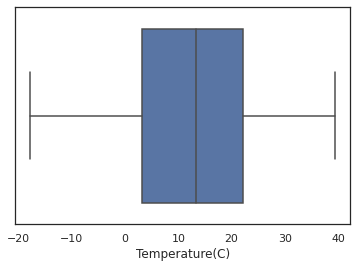

In [110]:
sns.boxplot(Bikes_df2['Temperature(C)'])

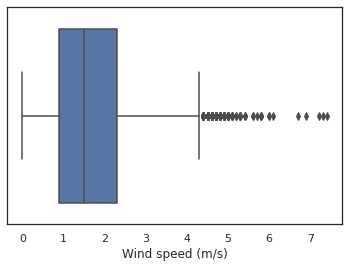

In [111]:
sns.boxplot(Bikes_df2['Wind speed (m/s)'])

In [112]:
Bikes_df2.rename(columns = {'Wind speed (m/s)':'WS'}, inplace = True)

In [113]:
Q1 = np.percentile(Bikes_df2['WS'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(Bikes_df2['WS'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(Bikes_df2['WS'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.1999999999999997
upper limit: 4.3999999999999995


In [114]:
Bikes_df2=Bikes_df2[Bikes_df2.WS<up_lim]
Bikes_df2=Bikes_df2[Bikes_df2.WS>low_lim]

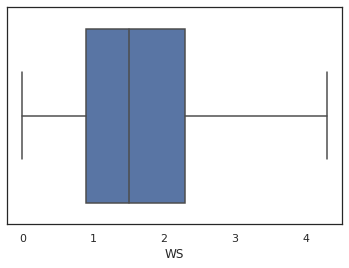

In [115]:
sns.boxplot(Bikes_df2.WS)

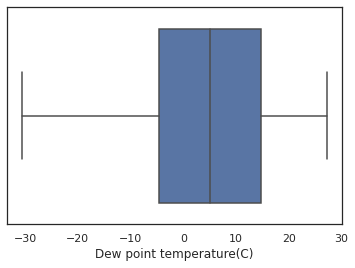

In [116]:
sns.boxplot(Bikes_df2['Dew point temperature(C)'])

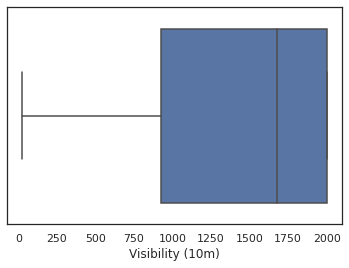

In [117]:
sns.boxplot(Bikes_df2['Visibility (10m)'])

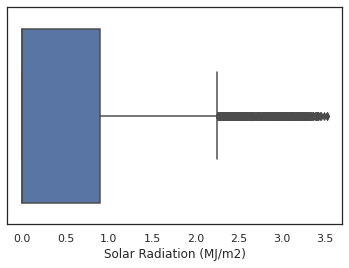

In [118]:
sns.boxplot(Bikes_df2['Solar Radiation (MJ/m2)'])

In [119]:
Bikes_df2.rename(columns = {'Solar Radiation (MJ/m2)':'SR'}, inplace = True)

In [120]:
Q1 = np.percentile(Bikes_df2['SR'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(Bikes_df2['SR'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(Bikes_df2['SR'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.35
upper limit: 2.25


In [121]:
Bikes_df2 = Bikes_df2[Bikes_df2.SR< up_lim]
Bikes_df2 = Bikes_df2[Bikes_df2.SR>low_lim]

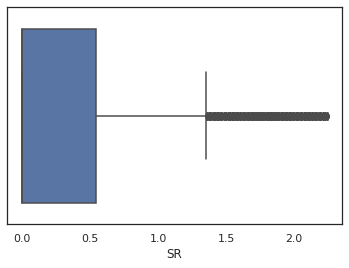

In [122]:
sns.boxplot(Bikes_df2.SR)

In [123]:
Bikes_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7752 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      7752 non-null   datetime64[ns]
 1   RBC                       7752 non-null   int64         
 2   Hour                      7752 non-null   int64         
 3   Temperature(C)            7752 non-null   float64       
 4   Humidity(%)               7752 non-null   int64         
 5   WS                        7752 non-null   float64       
 6   Visibility (10m)          7752 non-null   int64         
 7   Dew point temperature(C)  7752 non-null   float64       
 8   SR                        7752 non-null   float64       
 9   Rainfall(mm)              7752 non-null   float64       
 10  Snowfall (cm)             7752 non-null   float64       
 11  Seasons                   7752 non-null   object        
 12  Holiday             

In [124]:
# Correlation between variables
data_corr=Bikes_df2.corr()
data_corr=data_corr['RBC'][1:]
data_corr[abs(data_corr)>=0.0].sort_values(ascending=False)

Temperature(C)              0.533168
Hour                        0.400517
Dew point temperature(C)    0.381486
Summer                      0.300130
SR                          0.248899
Year                        0.210914
Yes                         0.203973
Visibility (10m)            0.188051
WS                          0.106349
Month                       0.085771
No Holiday                  0.070541
tday                        0.047612
Spring                      0.013486
Rainfall(mm)               -0.125173
Snowfall (cm)              -0.140926
Humidity(%)                -0.162957
Winter                     -0.420918
Name: RBC, dtype: float64

In [125]:
Bikes_categorical2=Bikes_df2

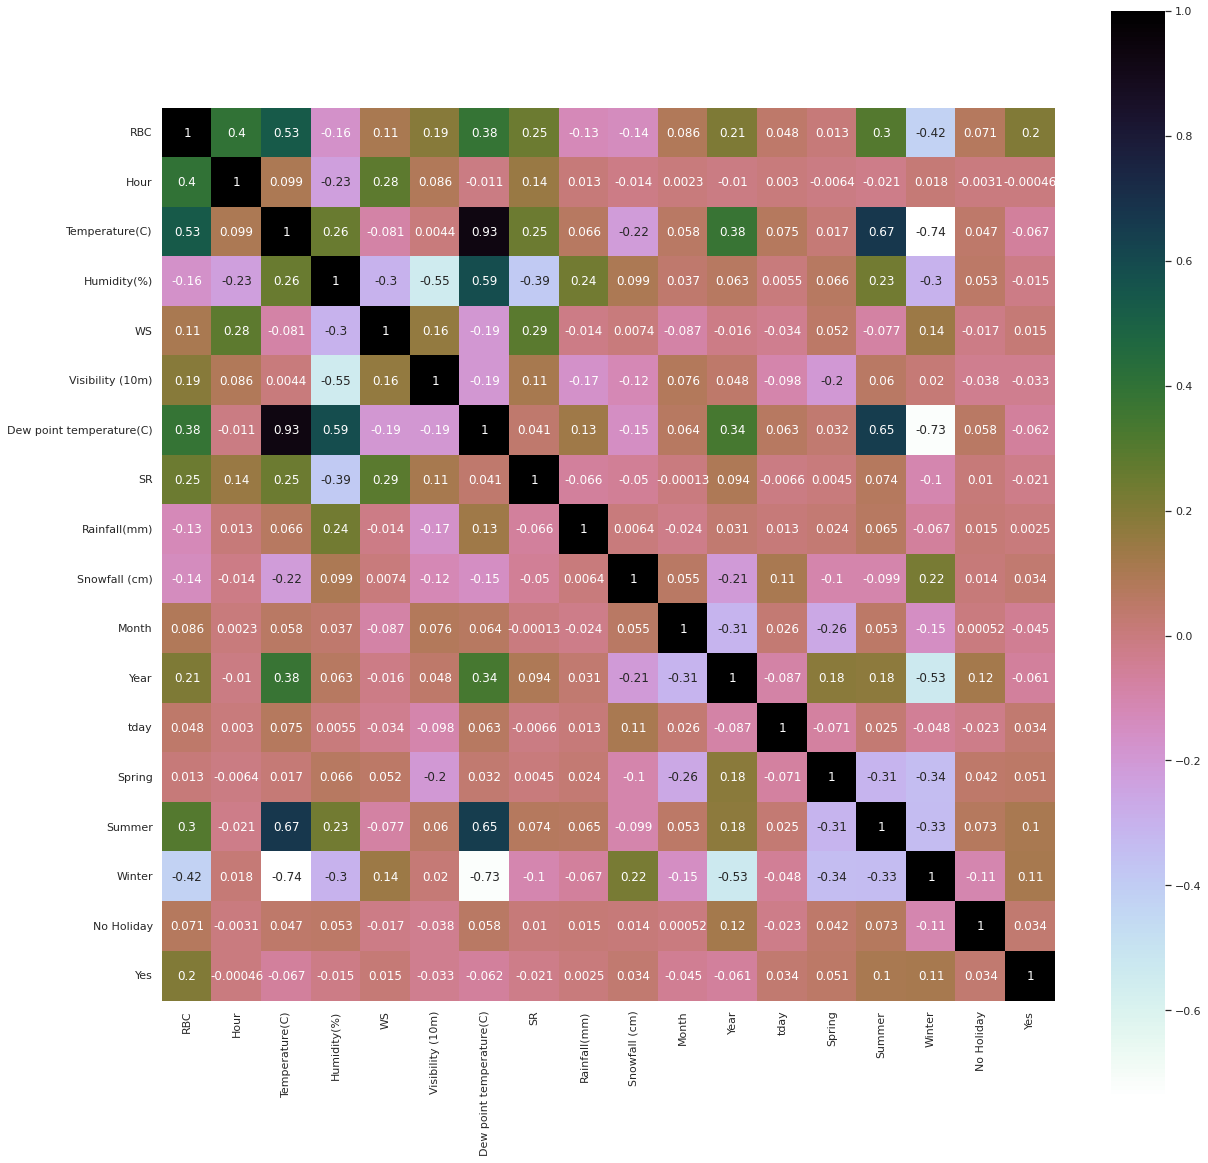

In [126]:
corr=Bikes_categorical2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

In [127]:
print(Bikes_categorical2.shape)
print(Bikes_categorical2.columns.values)

(7752, 22)
['Date' 'RBC' 'Hour' 'Temperature(C)' 'Humidity(%)' 'WS'
 'Visibility (10m)' 'Dew point temperature(C)' 'SR' 'Rainfall(mm)'
 'Snowfall (cm)' 'Seasons' 'Holiday' 'Functioning Day' 'Month' 'Year'
 'tday' 'Spring' 'Summer' 'Winter' 'No Holiday' 'Yes']


In [128]:
Bikes_categorical2=Bikes_categorical2.drop(['Date','Seasons','Holiday','Functioning Day','Rainfall(mm)'],axis=1)

In [129]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
  
# To scale data
scaler.fit(Bikes_categorical2)
#from sklearn.preprocessing import normalize
#normalize(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [130]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(Bikes_categorical2, test_size=0.25)

In [131]:
trainx=train.drop(['RBC'],axis=1)
trainy=train['RBC']

val_x=val.drop(['RBC'],axis=1)
val_y=val['RBC']

In [132]:
print(trainy.shape)
print(trainx.shape)
print(val_y.shape)
print(val_x.shape)
test=Bikes_df[6570:]

(5814,)
(5814, 16)
(1938,)
(1938, 16)


In [133]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred=lr.predict(val_x)

In [135]:
print("The model's metrics values are: ")
print("Accuracy: ", lr.score(val_x,val_y))
print("Mean Absolute Error: ",mean_absolute_error(df_pred , val_y))
print("Mean Squared Error: " ,mean_squared_error(df_pred,val_y))
print("R-squared score: ", r2_score(val_y,df_pred))

The model's metrics values are: 
Accuracy:  0.5576004263643248
Mean Absolute Error:  302.63377076527286
Mean Squared Error:  154881.95869089846
R-squared score:  0.5576004263643248


In [136]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge
ridge.fit(trainx,trainy)
rp=ridge.predict(val_x)
ridge_score = ridge.score(val_x,val_y)

ridge.coef_
print("Ridge:")
print("R-square score:", r2_score(rp,val_y))
print("Training score",ridge_score)

Ridge:
R-square score: 0.20673408914829505
Training score 0.5577081305170086


In [137]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso
lasso.fit(trainx,trainy)
lp=lasso.predict(val_x)
lasso_score = lasso.score(val_x,val_y)
lasso.coef_
print("Lasso:")
print("R-squared score:",r2_score(lp,val_y))
print("Training score",lasso_score)

Lasso:
R-squared score: 0.18955545031445142
Training score 0.5574749295713445


In [138]:
# Linear regression equation 
print('yintercept = %.2f' % regr.intercept_)
print('LogP = %.2f LogP' % regr.coef_[0])
print('MW = %.4f MW' % regr.coef_[1])
print('RB = %.4f RB' % regr.coef_[2])
print('AP = %.2f AP' % regr.coef_[3])

yintercept = -201997.11
LogP = 24.13 LogP
MW = 28.7691 MW
RB = -7.6804 RB
AP = 7.34 AP


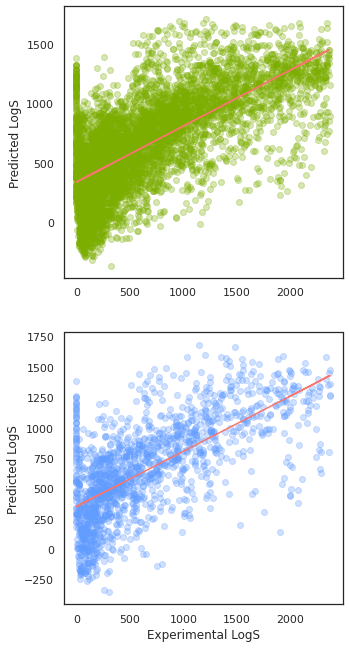

In [139]:
# Scatter plot of experimental vs. predicted Logs
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,11))
plt.subplot(2,1,1)
plt.scatter(x=Y_train,y=Y_pred_train, c='#7CAE00',alpha=0.3)
z=np.polyfit(Y_train,Y_pred_train,1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),'#F8766D')
plt.ylabel('Predicted Logs')

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')

plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.show()